In [2]:
class KalmanFilter:
    def __init__(self, q_angle=0.01, q_bias=0.03, r_measure=5.0):
        self.q_angle = q_angle
        self.q_bias = q_bias
        self.r_measure = r_measure
        self.angle = 0.0
        self.bias = 0.0
        self.rate = 0.0
        self.p_error = [[0.0, 0.0], [0.0, 0.0]]
        self.k_gain = [0.0, 0.0]
        self.y = 0.0
        self.s = 0.0
        
    def update(self, new_angle, new_rate, dt):
        # Update the estimated state
        # Since we can not directly measure the bias the estimate of the a priori bias is just equal to the previous one.
        self.rate = new_rate - self.bias
        self.angle += dt * self.rate

        # Update the estimation error covariance matrix
        self.p_error[0][0] += dt * (dt*self.p_error[1][1] - self.p_error[0][1] - self.p_error[1][0] + self.q_angle)
        self.p_error[0][1] -= dt * self.p_error[1][1]
        self.p_error[1][0] -= dt * self.p_error[1][1]
        self.p_error[1][1] += dt * self.q_bias

        # Compute the Kalman gain
        self.s = self.p_error[0][0] + self.r_measure
        self.k_gain[0] = self.p_error[0][0] / self.s
        self.k_gain[1] = self.p_error[1][0] / self.s

        # Compute the angle and bias and update them with measurement zk
        self.y = new_angle - self.angle
        self.angle += self.k_gain[0] * self.y
        self.bias += self.k_gain[1] * self.y

        # Compute the estimation error covariance
        self.p_error[0][0] -= self.k_gain[0] * self.p_error[0][0]
        self.p_error[0][1] -= self.k_gain[0] * self.p_error[0][1]
        self.p_error[1][0] -= self.k_gain[1] * self.p_error[0][0]
        self.p_error[1][1] -= self.k_gain[1] * self.p_error[0][1]

        return (self.angle, self.rate)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

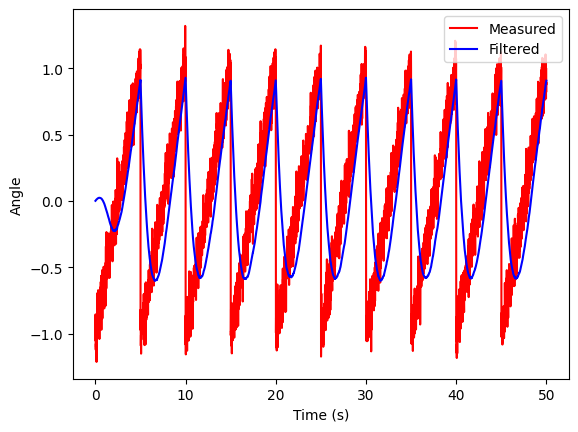

In [4]:
# Generate sawtooth wave with noise
dt = 0.01
t = np.arange(0, 50, dt)
f = 0.2
sawtooth = np.mod(t * f, 1.0) * 2.0 - 1.0
noise = np.random.normal(0, 0.1, len(t))
measured = sawtooth + noise

# Run Kalman filter on measured data
kf = KalmanFilter()
filtered = np.zeros(len(t))
for i in range(len(t)):
    angle, rate = kf.update(measured[i], 0.1, dt)
    filtered[i] = angle

# Plot results
plt.plot(t, measured, 'r', label='Measured')
plt.plot(t, filtered, 'b', label='Filtered')
plt.legend(loc='upper right')
plt.xlabel('Time (s)')
plt.ylabel('Angle')
plt.show()